In [1]:
# IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import loguniform
from sklearn.model_selection import RepeatedKFold, RandomizedSearchCV

In [2]:
# Cargar los datos
datos = pd.read_csv(r'C:Users\52441\articulos_ml.csv', low_memory=False)

FileNotFoundError: [Errno 2] No such file or directory: 'C:Users\\52441\\articulos_ml.csv'

In [ ]:
# Muestra de los primeros datos
print(datos)

In [ ]:
# Descripción estadística de los datos
print(datos.describe())

In [3]:
# Graficar la relación entre '# of comments' y '# Shares'
plt.figure(figsize=(10, 6))
plt.scatter(datos['# of comments'], datos['# Shares'], color='gray', label='Datos Reales')
plt.xlabel('# of Comments')
plt.ylabel('# Shares')
plt.title('Relación entre # of Comments y # Shares')
plt.legend()
plt.show()

NameError: name 'datos' is not defined

<Figure size 1000x600 with 0 Axes>

In [4]:
# Generar un histograma de los datos '# Shares'
plt.figure(figsize=(15, 10))
plt.tight_layout()
seabornInstance.histplot(datos['# Shares'], kde=True)
plt.title('Distribución de # Shares')
plt.xlabel('# Shares')
plt.ylabel('Frecuencia')
plt.show()


NameError: name 'plt' is not defined

In [5]:
# Eliminar filas con valores nulos en las columnas relevantes
datos = datos.dropna(subset=['# of comments', '# Shares'])

# Asignamos '# of comments' como variable independiente (X) y '# Shares' como variable dependiente (y)
X = datos[['# of comments']].values  # Variable independiente
y = datos['# Shares'].values  # Variable dependiente

NameError: name 'datos' is not defined

In [6]:
X

NameError: name 'X' is not defined

In [7]:
y

NameError: name 'y' is not defined

In [8]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'train_test_split' is not defined

In [9]:
# Crear el modelo de regresión lineal (Ridge)
modelo = Ridge()

NameError: name 'Ridge' is not defined

In [10]:
# Entrenar el modelo
modelo.fit(X_train, y_train)

NameError: name 'modelo' is not defined

In [14]:
# Realizar las predicciones
y_pred = modelo.predict(X_test)

<Figure size 1600x1000 with 0 Axes>

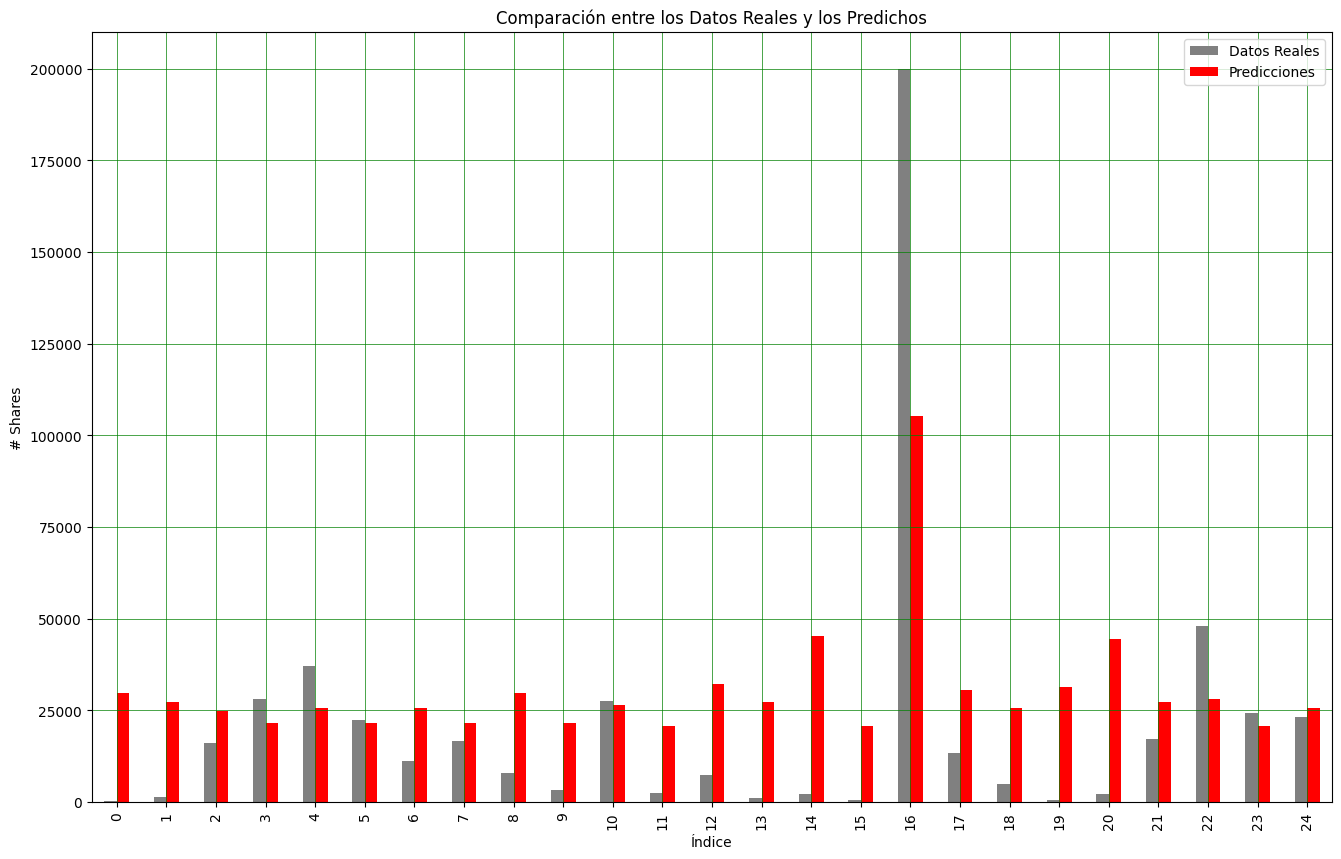

In [29]:
# Crear un DataFrame con los valores reales y predichos
datos2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicho': y_pred.flatten()})

# Mostrar los primeros 25 valores
datos3 = datos2.head(25)

# Graficar la comparación en un gráfico de barras
plt.figure(figsize=(16,10))
datos3.plot(kind='bar', figsize=(16, 10), color=['gray', 'red'])

# Etiquetas y título
plt.xlabel('Índice')
plt.ylabel('# Shares')
plt.title('Comparación entre los Datos Reales y los Predichos')

# Mostrar la leyenda
plt.legend(['Datos Reales', 'Predicciones'])

# Mostrar las cuadrículas
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Mostrar el gráfico
plt.show()

In [3]:
# Graficar la relación entre 'Shares' y 'comments', con la línea de regresión
plt.figure(figsize=(10, 6))

# Graficar los puntos reales
plt.scatter(X_test, y_test, color='gray', label='Datos Reales')

# Graficar la línea de regresión
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión')

# Etiquetas y título
plt.xlabel('# of comments')
plt.ylabel('# Shares')
plt.title('Relación entre # of Comments y # Shares con Regresión Lineal')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

NameError: name 'X_test' is not defined

<Figure size 1000x600 with 0 Axes>

In [31]:
# Evaluar el modelo
print('Error Absoluto Medio:', mean_absolute_error(y_test, y_pred))
print('Error Cuadrático Medio:', mean_squared_error(y_test, y_pred))
print('Raíz del Error Cuadrático Medio:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Coeficiente de Determinación R²:', modelo.score(X_test, y_test))

# Imprimir el coeficiente de determinación R² con los datos reales y el nuevo modelo
print("Coeficiente de determinación R2 (Con todos los datos): ", modelo.score(X, y))

Error Absoluto Medio: 20939.70401314506
Error Cuadrático Medio: 784081471.7603741
Raíz del Error Cuadrático Medio: 28001.454815069414
Coeficiente de Determinación R²: 0.4587800003631114
Coeficiente de determinación R2 (Con todos los datos):  0.17144472707516056


In [32]:
# Definir el espacio de búsqueda para la optimización
space = dict()
space['alpha'] = loguniform(1e-10, 100)
space['fit_intercept'] = [True, False]
space['solver'] = ['svd', 'cholesky', 'lsqr', 'sag']


In [33]:
# Definir la búsqueda con validación cruzada
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
search = RandomizedSearchCV(modelo, space, n_iter=10, scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv, random_state=1)

In [34]:
# Ejecutar la búsqueda
result = search.fit(X, y)

In [35]:
# Mostrar los mejores resultados de la búsqueda
print('Mejor puntuación:', result.best_score_)
print('Mejores Hiperparámetros:', result.best_params_)

Mejor puntuación: -21729.895555218518
Mejores Hiperparámetros: {'alpha': np.float64(1.0723441152701025e-05), 'fit_intercept': True, 'solver': 'svd'}


In [36]:
# Optimizar el modelo con los hiperparámetros obtenidos
modelo = Ridge(fit_intercept=result.best_params_['fit_intercept'], 
               solver=result.best_params_['solver'], 
               alpha=result.best_params_['alpha'])

In [37]:
# Re-entrenar el modelo con los mejores parámetros
modelo.fit(X_train, y_train)

Ridge(alpha=np.float64(1.0723441152701025e-05), solver='svd')

In [38]:
# Realizar las predicciones con el modelo optimizado
y_pred = modelo.predict(X_test)

In [39]:
# Recalcular el Error Absoluto Medio con el modelo optimizado
print('Nuevo Error Absoluto Medio:', mean_absolute_error(y_test, y_pred))

# Recalcular el Coeficiente de Determinación R² con el modelo optimizado
print('Nuevo Coeficiente de Determinación R2:', modelo.score(X_test, y_test))
# Imprimir el coeficiente de determinación R² con los datos reales y el nuevo modelo
print("Coeficiente de determinación R2 (Con todos los datos): ", modelo.score(X, y))

Nuevo Error Absoluto Medio: 20939.70401314506
Nuevo Coeficiente de Determinación R2: 0.4587800003631114
Coeficiente de determinación R2 (Con todos los datos):  0.17144472707516056


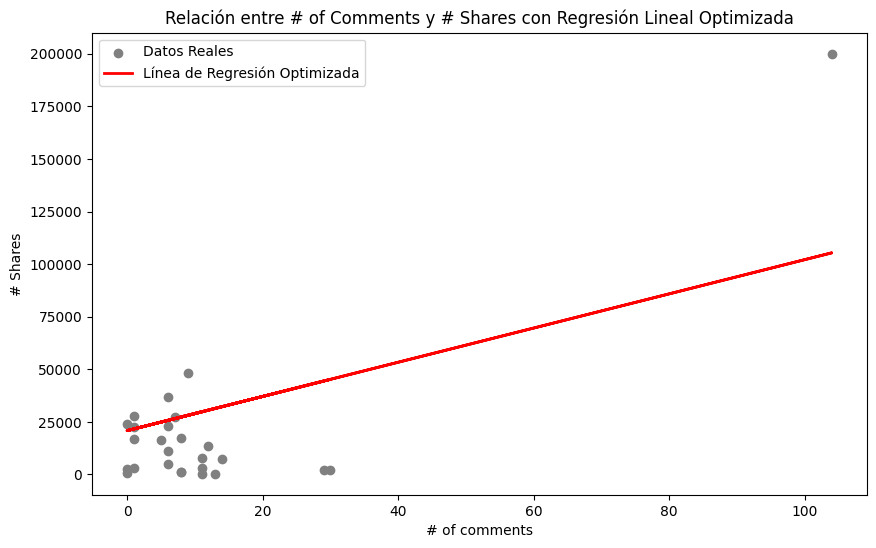

In [40]:
# Graficar la relación entre los valores reales y los predichos
plt.figure(figsize=(10, 6))

# Graficar los puntos reales
plt.scatter(X_test, y_test, color='gray', label='Datos Reales')

# Graficar la línea de regresión optimizada
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de Regresión Optimizada')

# Etiquetas y título
plt.xlabel('# of comments')
plt.ylabel('# Shares')
plt.title('Relación entre # of Comments y # Shares con Regresión Lineal Optimizada')

# Mostrar leyenda
plt.legend()

# Mostrar la gráfica
plt.show()